In [106]:
import numpy as np 
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [107]:
df = pd.read_csv("../data/cpucycle.csv")

In [108]:
df.head()

,timestamp,cpu
0,2024-01-01 00:00:00,0.22
1,2024-01-01 00:00:30,0.26
2,2024-01-01 00:01:00,0.16
3,2024-01-01 00:01:30,0.16
4,2024-01-01 00:02:00,0.10


In [109]:
df.set_index("timestamp", inplace=True)

In [110]:
df.index = pd.to_datetime(df.index)

In [111]:
df.index

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 00:00:30',
               '2024-01-01 00:01:00', '2024-01-01 00:01:30',
               '2024-01-01 00:02:00', '2024-01-01 00:02:30',
               '2024-01-01 00:03:00', '2024-01-01 00:03:30',
               '2024-01-01 00:04:00', '2024-01-01 00:04:30',
               ...
               '2024-01-30 23:55:30', '2024-01-30 23:56:00',
               '2024-01-30 23:56:30', '2024-01-30 23:57:00',
               '2024-01-30 23:57:30', '2024-01-30 23:58:00',
               '2024-01-30 23:58:30', '2024-01-30 23:59:00',
               '2024-01-30 23:59:30', '2024-01-31 00:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=85749, freq=None)

In [112]:
df.head()

,cpu
timestamp,
2024-01-01 00:00:00,0.22
2024-01-01 00:00:30,0.26
2024-01-01 00:01:00,0.16
2024-01-01 00:01:30,0.16
2024-01-01 00:02:00,0.10


In [113]:
print(df.index.dtype)


datetime64[ns]


In [114]:
df = df.asfreq("30s")


In [115]:
window = 7 * 24 * 60 * 2
y_recent = df
y_train = y_recent[(-window * 2):-window]
y_test = y_recent[-window:]


In [116]:
print(df.index.freq)


<30 * Seconds>


In [117]:
print(y_train.describe)


<bound method NDFrame.describe of                       cpu
timestamp                
2024-01-17 00:00:30  0.21
2024-01-17 00:01:00  0.13
2024-01-17 00:01:30  0.08
2024-01-17 00:02:00  0.10
2024-01-17 00:02:30  0.12
...                   ...
2024-01-23 23:58:00  0.02
2024-01-23 23:58:30  0.01
2024-01-23 23:59:00  0.00
2024-01-23 23:59:30  0.26
2024-01-24 00:00:00  0.23

[20160 rows x 1 columns]>


In [118]:
model = IsolationForest(contamination=0.02, random_state=42)
anomaly = model.fit_predict(y_train)

y_train["anomaly"] = anomaly
normal = y_train[y_train["anomaly"] == 1]
anomaly = y_train[y_train["anomaly"] == -1]


C:\Users\pc\AppData\Local\Temp\ipykernel_37300\794018173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train["anomaly"] = anomaly


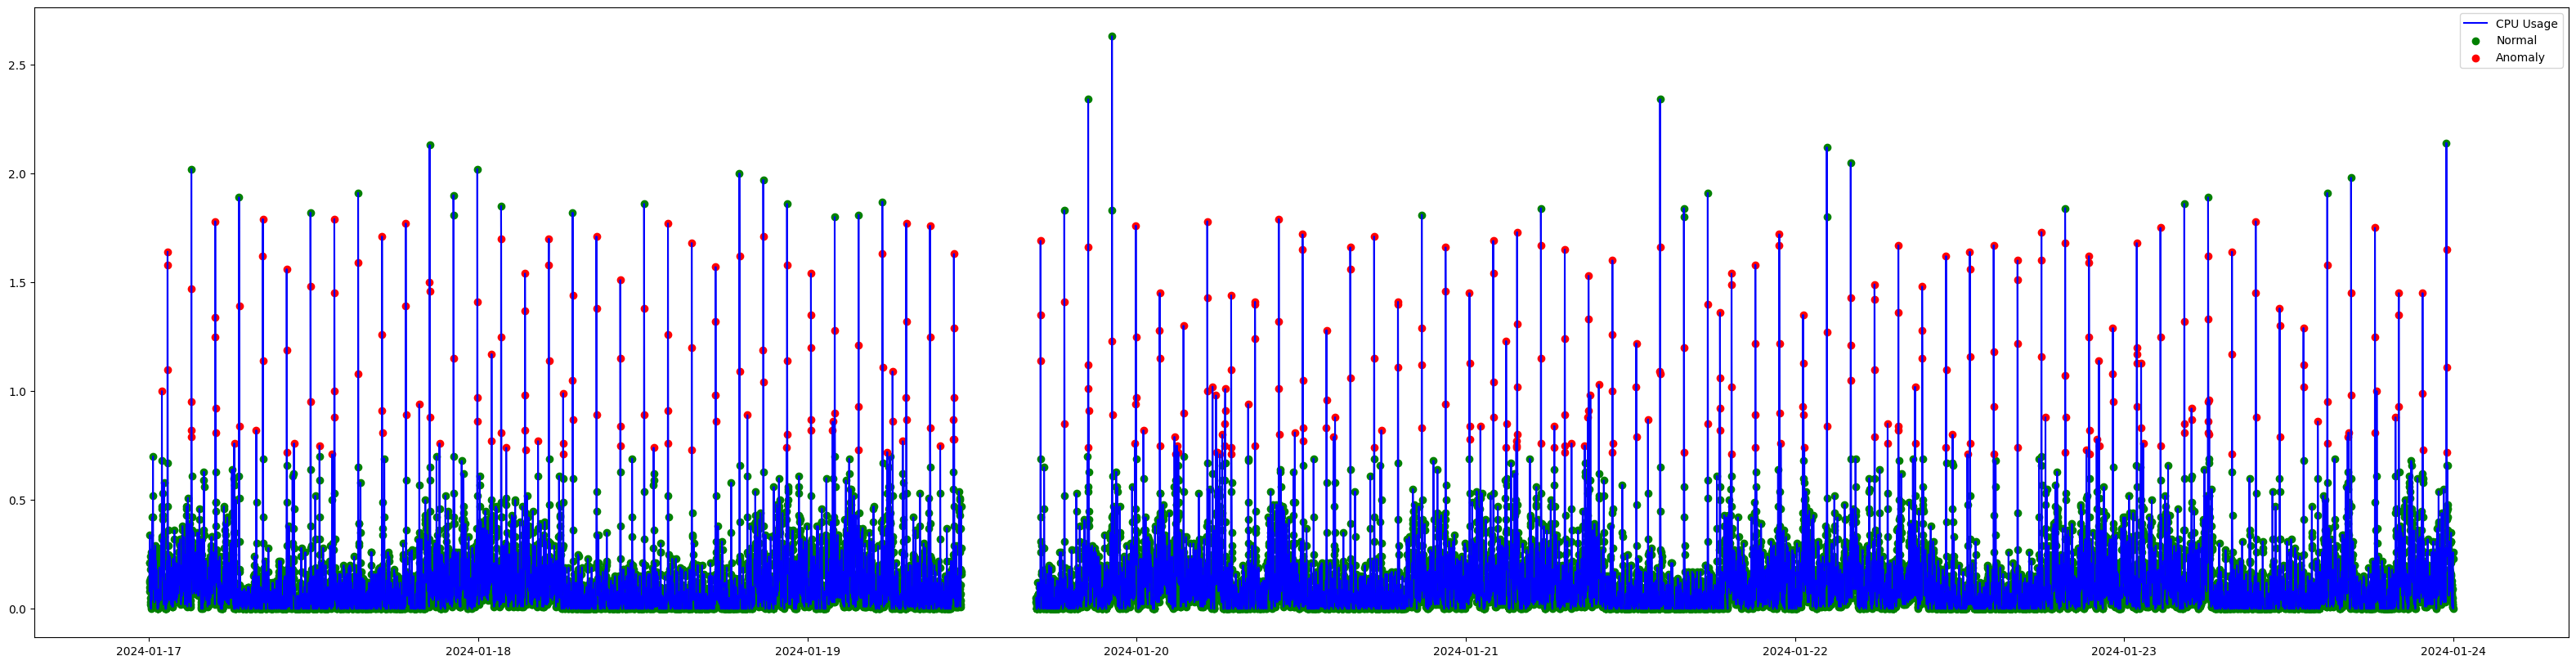

In [119]:
plt.figure(figsize=(40,10))

plt.plot(y_train.index, y_train["cpu"], label="CPU Usage", color="blue")
plt.scatter(normal.index, normal["cpu"], color="green", label="Normal")
plt.scatter(anomaly.index, anomaly["cpu"], color="red", label="Anomaly")
plt.legend()
plt.show()

In [124]:
model = IsolationForest(contamination=0.01, random_state=42)
test_anomaly = model.fit_predict(y_test)

In [125]:
y_test["anomaly"] = test_anomaly
normal = y_test[y_test["anomaly"] == 1]
anomaly = y_test[y_test["anomaly"] == -1]

C:\Users\pc\AppData\Local\Temp\ipykernel_37300\3794186915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["anomaly"] = test_anomaly


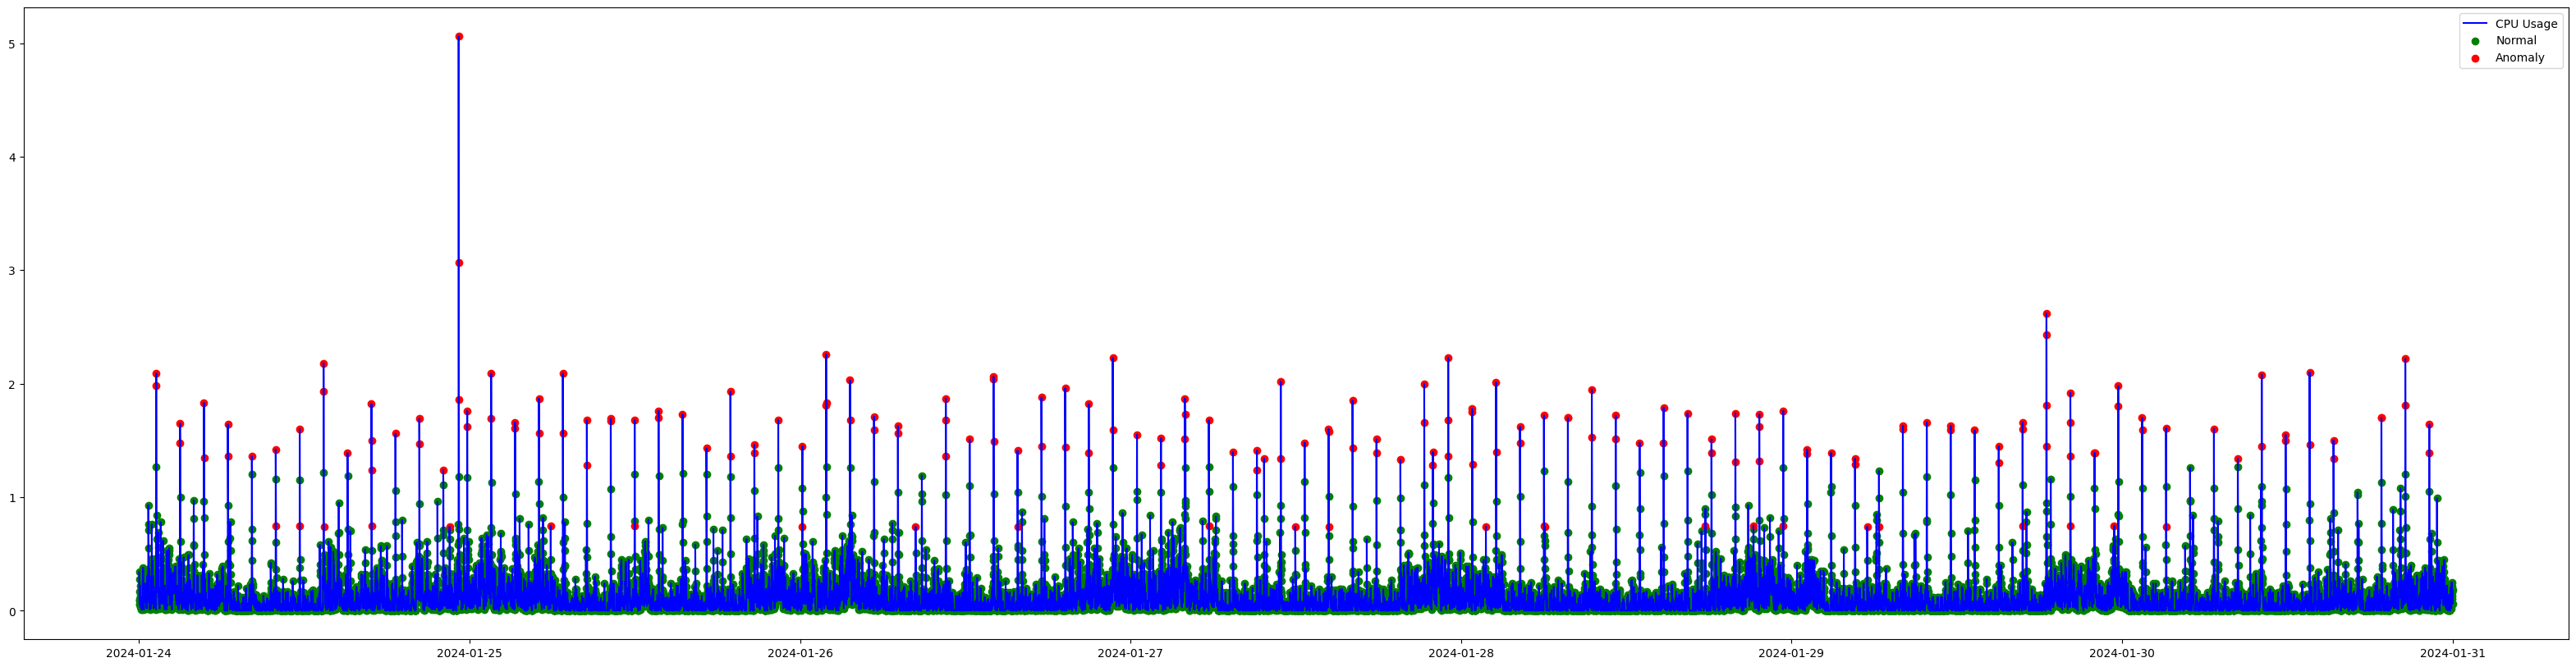

In [127]:
plt.figure(figsize=(40,10))

plt.plot(y_test.index, y_test["cpu"], label="CPU Usage", color="blue")
plt.scatter(normal.index, normal["cpu"], color="green", label="Normal")
plt.scatter(anomaly.index, anomaly["cpu"], color="red", label="Anomaly")
plt.legend()
plt.show()